In [1]:
using Gadfly, Optim, Distributions, Distances, Cairo, Fontconfig

In [25]:
function computeInterval(dist₁::Distribution, dist₂::Distribution, alpha::Real)
    alpha = .05
    q₅ = [quantile(dist₁, alpha), quantile(dist₂, alpha)]
    q₉₅ = [quantile(dist₁, 1 - alpha), quantile(dist₂, 1 - alpha)]

    return minimum(q₅), maximum(q₉₅)
end;

In [26]:
function KLOptim(θ₀::DenseVector)
    # Distribution cible
    dist₁ = GeneralizedExtremeValue(5, 1, 0);
    # Distribution d'approximation (état initial)
    dist₂ = Normal(θ₀[1], θ₀[2])
    
    # Délimitation de l'intervalle de calcul de la KL
    a, b = computeInterval(dist₁, dist₂, .05)
    x = a:.1:b

    function KLDivergence(θ::Vector{<:Real})
        # Distribution d'approximation
        dist₂ = Normal(θ[1], θ[2])
        
        # Évaluation des densités
        p = pdf.(dist₁, x)
        q = pdf.(dist₂, x)
        return kl_divergence(p, q)
    end;
    
    res = optimize(KLDivergence, θ₀);
    return res
end;

In [27]:
θ₀ = [-100, 3.0];

res = KLOptim(θ₀)

 * Status: success

 * Candidate solution
    Final objective value:     -9.794436e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    48
    f(x) calls:    95


In [19]:
θ̂ = Optim.minimizer(res);

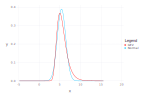

In [23]:
b1 = θ̂[1] - 10*θ̂[2]
b2 = θ̂[1] + 10*θ̂[2]
x = b1:.1:b2

p = plot(
    layer(x=x, y=pdf.(GeneralizedExtremeValue(5, 1, 0), x), Geom.line, Theme(default_color="red")),
    layer(x=x, y=pdf.(Normal(θ̂[1], θ̂[2]), x), Geom.line, Theme(default_color="deepskyblue")),
    Guide.manual_color_key("Legend", ["GEV", "Normal"], ["red", "deepskyblue"]),
    Theme(background_color="white"),
)

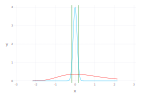

In [8]:
μ = 0;
sigma = .1;
dist = Normal(μ, sigma)

alpha = .05
q₅ = quantile(dist, alpha)
q₉₅ = quantile(dist, 1-alpha)

x = q₅-2:.01:q₉₅+2

plot(
    layer(x=x, y=pdf.(dist, x), xintercept=[q₅, q₉₅], Geom.line, Geom.vline(color=["green","green"])),
    layer(x=x, y=pdf.(GeneralizedExtremeValue(μ, 1, 0), x), Geom.line, Theme(default_color="red")),
    Theme(background_color="white"),
)

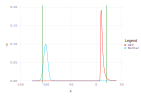

In [11]:
# Première distribution
μ₁ = -100;
σ₁ = 4;
dist₁ = Normal(μ₁, σ₁)

# Deuxième distribution
μ₂ = 10;
σ₂ = 2;
ξ₂ = 0.3;
dist₂ = GeneralizedExtremeValue(μ₂, σ₂, ξ₂);

# Calcul des quantiles
alpha = .05
q₅ = [quantile(dist₁, alpha), quantile(dist₂, alpha)]
q₉₅ = [quantile(dist₁, 1 - alpha), quantile(dist₂, 1 - alpha)]

a = minimum(q₅)
b = maximum(q₉₅)

x = a-20:.1:b+20

p = plot(
    layer(x=x, y=pdf.(GeneralizedExtremeValue(μ₂, σ₂, ξ₂), x), xintercept=[a, b], Geom.line, Geom.vline(color=["green","green"]), Theme(default_color="red")),
    layer(x=x, y=pdf.(Normal(μ₁, σ₁), x), Geom.line, Theme(default_color="deepskyblue")),
    Guide.manual_color_key("Legend", ["GEV", "Normal"], ["red", "deepskyblue"]),
    Theme(background_color="white"),
)